In [1]:
# Importing necessary libraries numpy, pandas, pyplot, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# import linear_model, LinearRegression, Ridge, lasso, GridSearchCV from sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


# import os
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the CarPrice_Assignment
cars = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
# summary of the dataset: 205 rows, 26 columns, no null values
cars.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

 0. car_ID: Unique id of each observation (Interger)                   
 1. symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)                
 2. CarName:Name of car company (Categorical)                
 3. fueltype:Car fuel type i.e gas or diesel (Categorical)                 
 4. aspiration:Aspiration used in a car (Categorical)               
 5. doornumber:Number of doors in a car (Categorical)               
 6. carbody:body of car (Categorical)                  
 7. drivewheel:type of drive wheel (Categorical)               
 8. enginelocation:Location of car engine (Categorical)           
 9. wheelbase:Weelbase of car (Numeric)               
 10. carlength:Length of car (Numeric)               
 11. carwidth: Width of car (Numeric)                
 12. carheight: Height of car(Numeric)               
 13. curbweight:The weight of a car without occupants or baggage. (Numeric)               
 14. enginetype:Type of engine. (Categorical)               
 15. cylindernumber:cylinder placed in the car (Categorical)           
 16. enginesize:Size of car (Numeric)               
 17. fuelsystem: Fuel system of car (Categorical).               
 18. boreratio:Boreratio of car (Numeric)               
 19. stroke: Stroke or volume inside the engine (Numeric).                
 20. compressionratio: Compression ratio of car (Numeric)        
 21. horsepower:Horsepower (Numeric)               
 22. peakrpm:Car peak rpm (Numeric)                  
 23. citympg:Mileage in city (Numeric)                  
 24. highwaympg:Mileage on highway (Numeric)               
 25. price:Price of car (Numeric)    

In [4]:
# print head
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Check each symboling attribute's count
cars['symboling'].astype('category').value_counts()

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

In [6]:
#Check each aspiration attribute's count
cars['aspiration'].astype('category').value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [7]:
#Check each drivewheel attribute's count
cars['drivewheel'].astype('category').value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

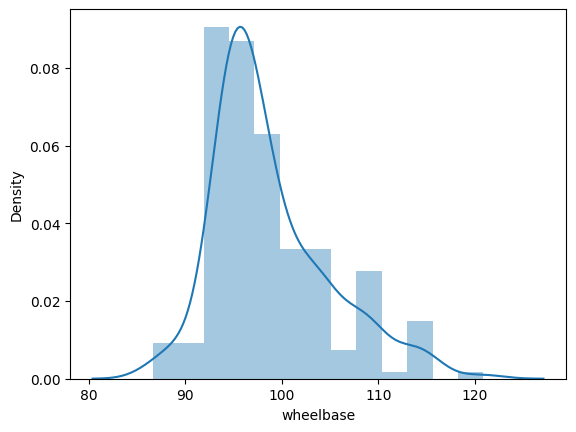

In [8]:
# plot wheetbase distribution
sns.distplot(cars['wheelbase'])
plt.show()



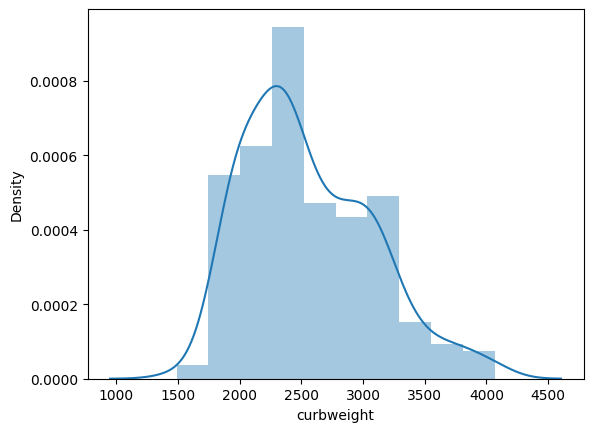

In [9]:
# plot curbweight distribution
sns.distplot(cars['curbweight'])
plt.show()

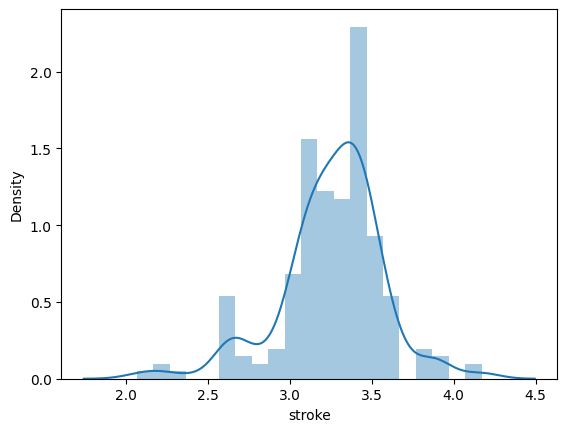

In [10]:
# plot stroke dsitribution
sns.distplot(cars['stroke'])
plt.show()

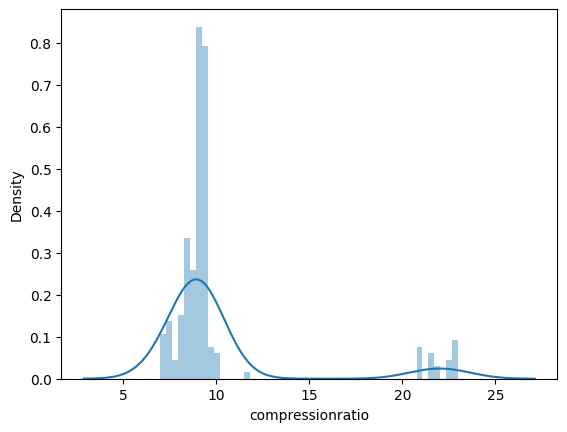

In [11]:
# plot compressionratio distribution
sns.distplot(cars['compressionratio'])
plt.show()

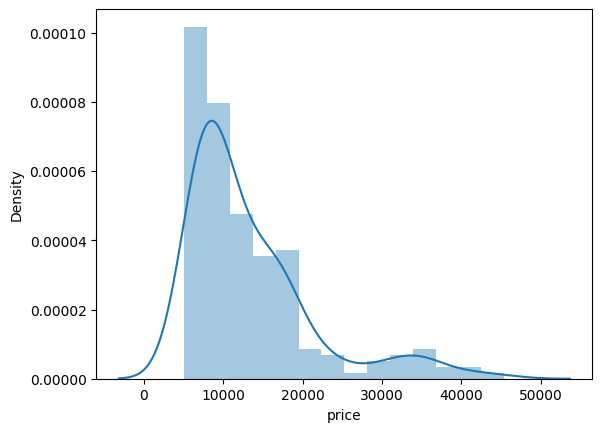

In [12]:
# Price distribution
sns.distplot(cars['price'])
plt.show()

In [13]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64','int64'])


#head
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
# dropping symboling and car_ID 
cars_numeric = cars_numeric.drop(['symboling'],axis=1)

# print head
cars_numeric.head()


,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 2000x1000 with 0 Axes>

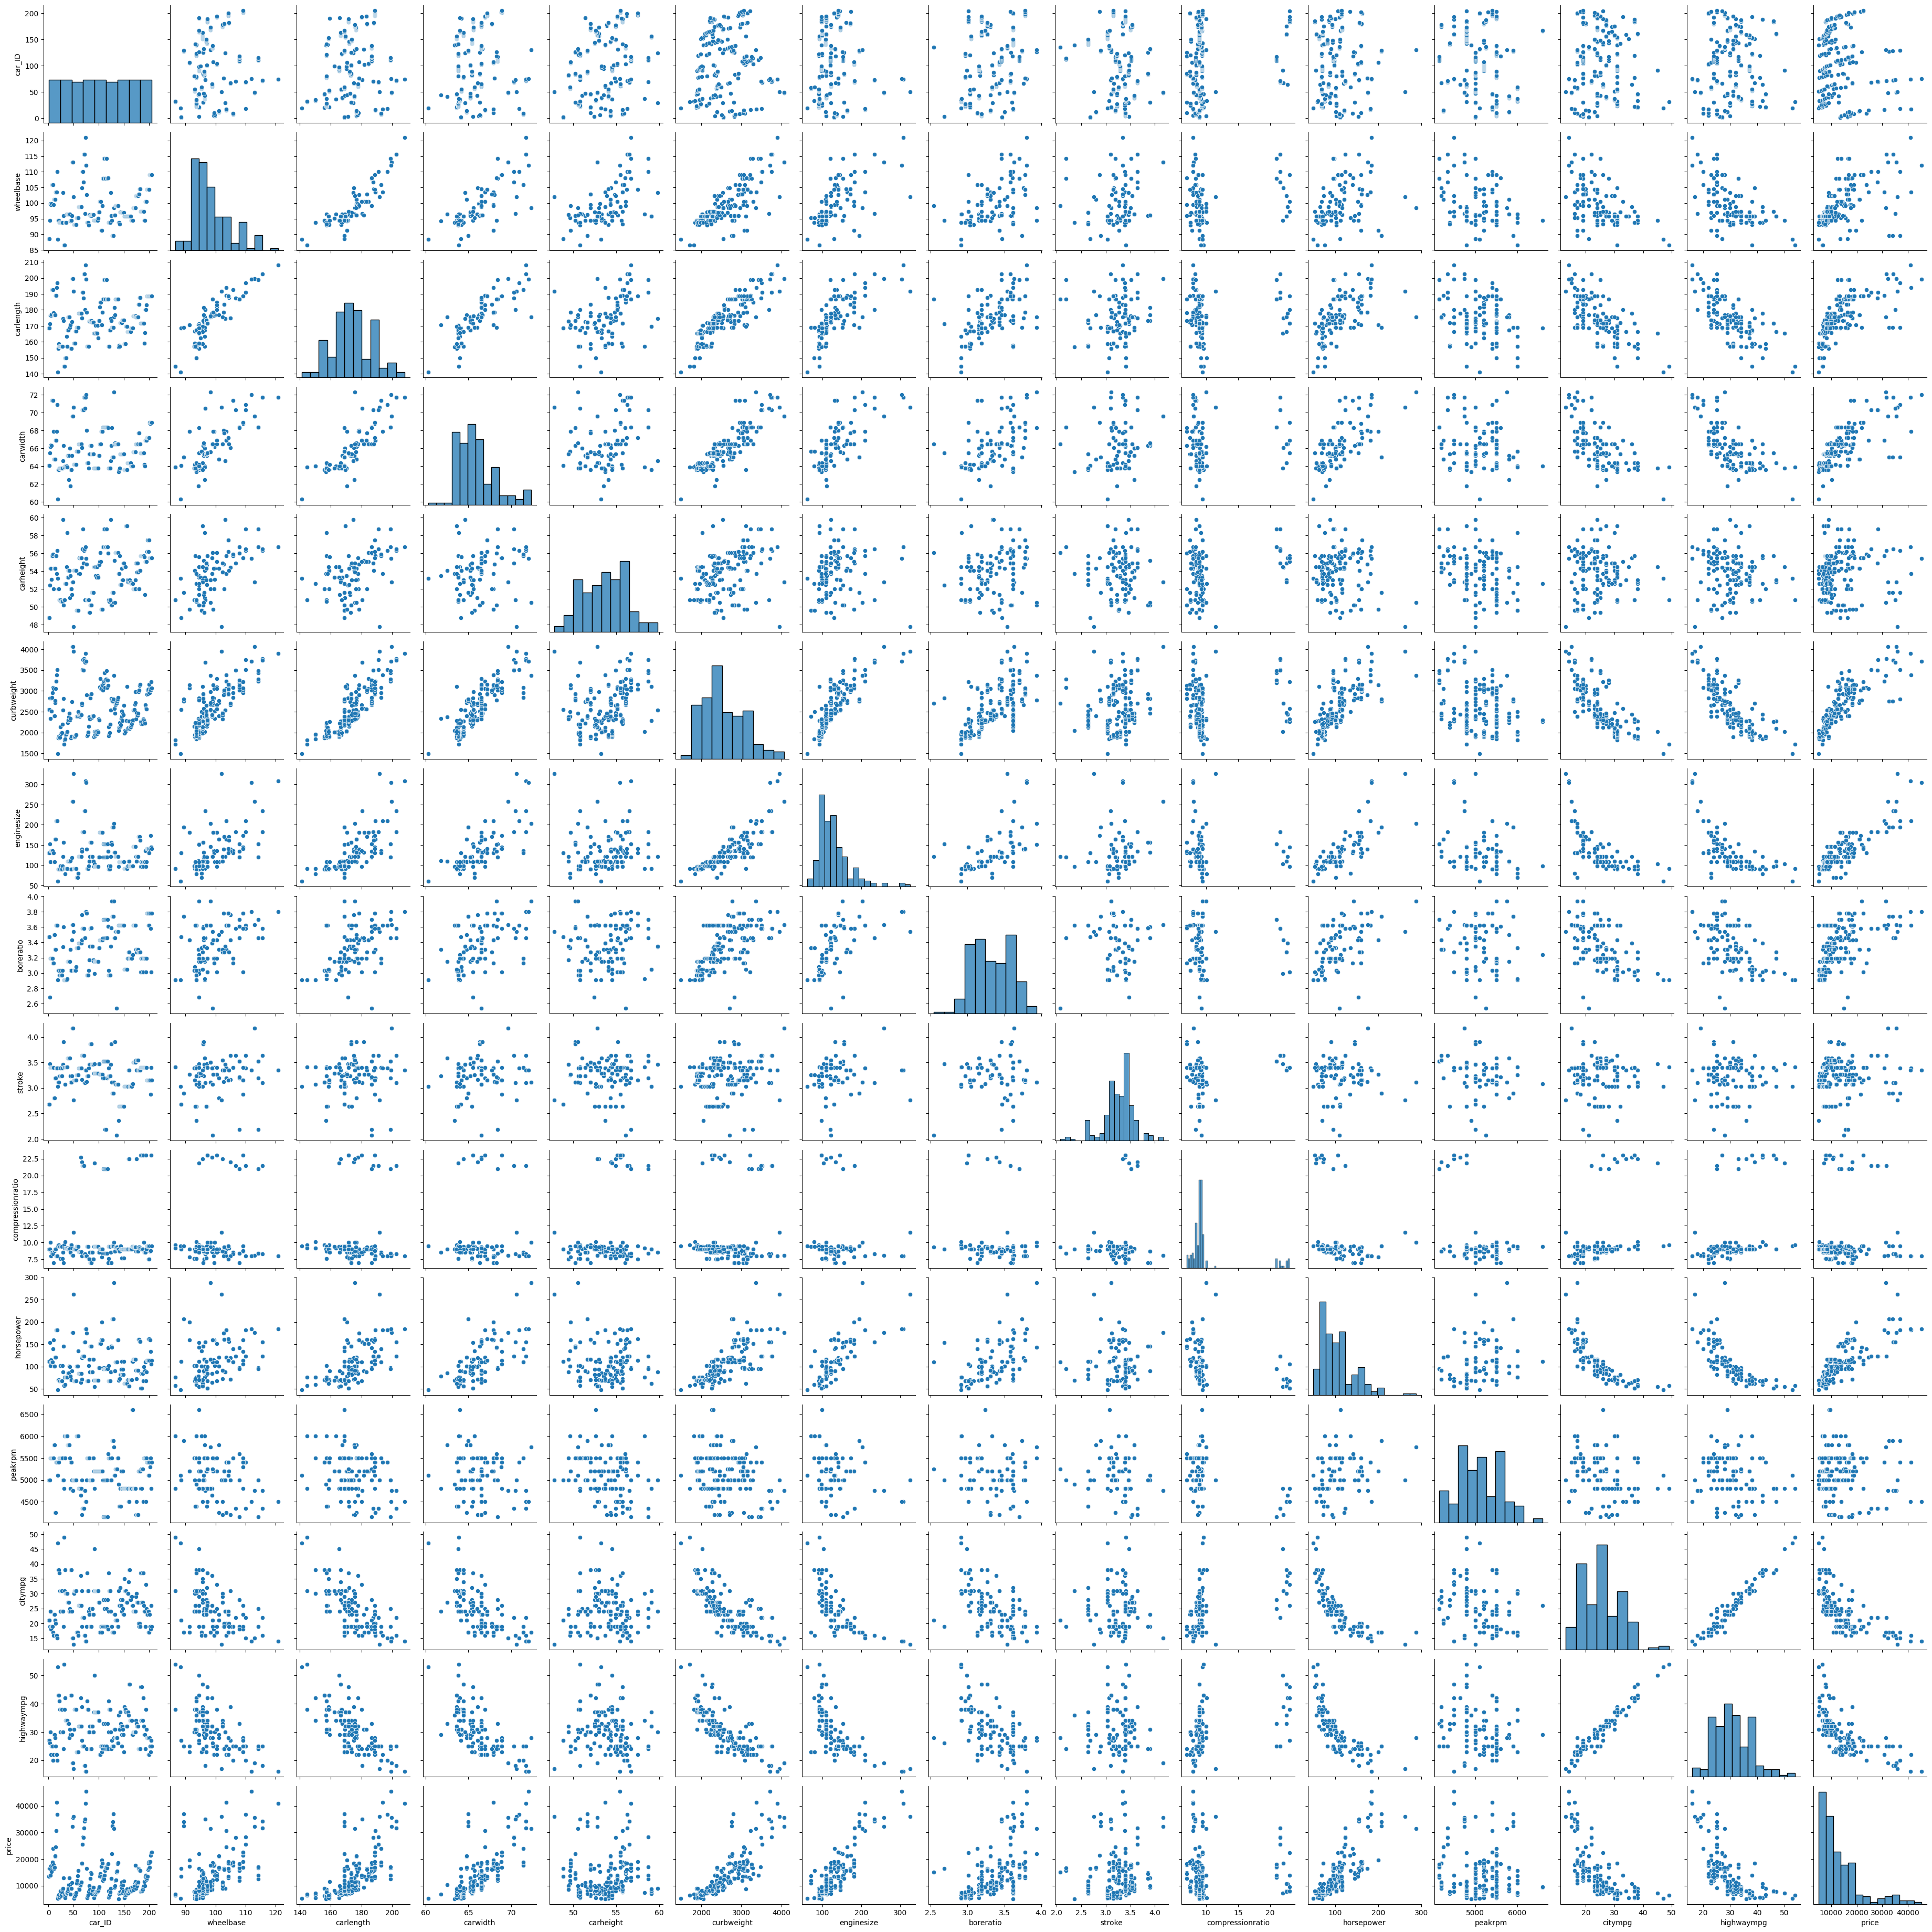

In [15]:
# paiwise scatter plot
plt.figure(figsize=(20,10))
sns.pairplot(cars_numeric)
plt.show()

In [16]:
# correlation matrix
cor = cars_numeric.corr()
cor


,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
wheelbase,0.129729,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.150276,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


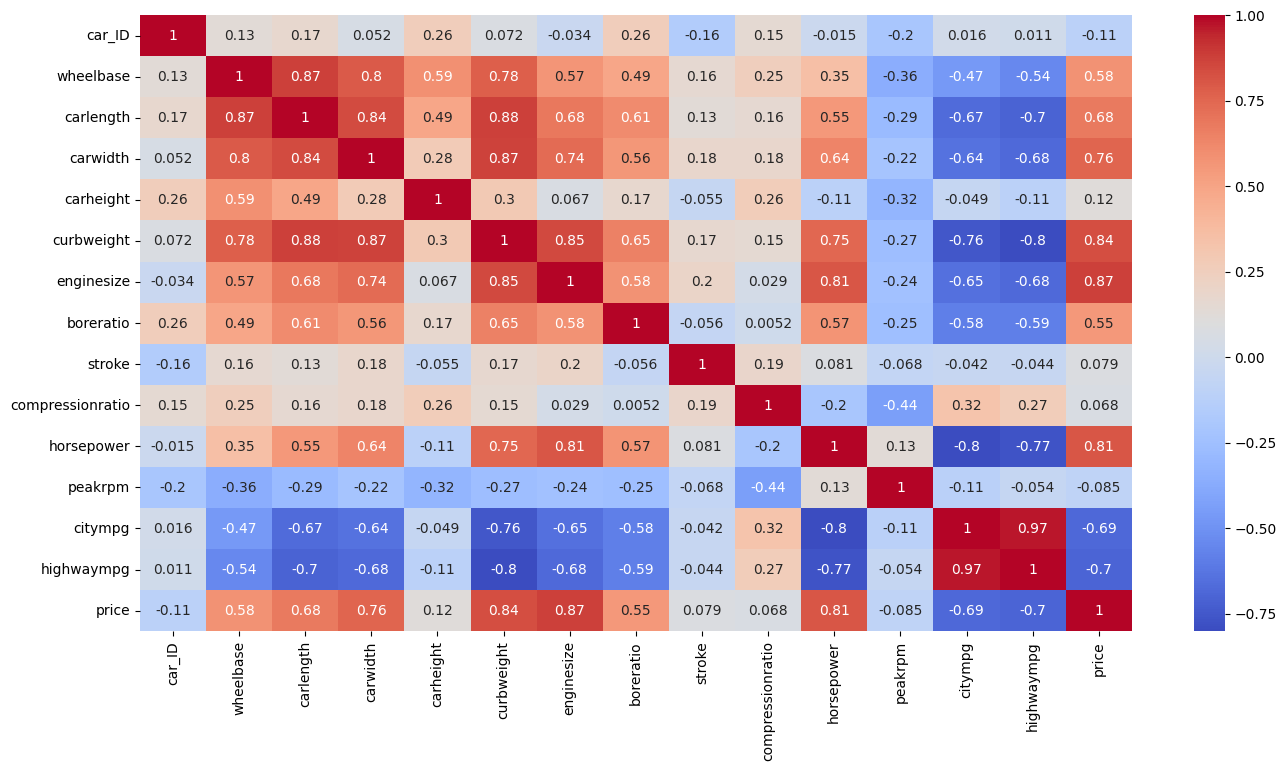

In [17]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap='coolwarm', annot=True)

plt.show()

In [18]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [19]:
# converting symboling to categorical by changing its datatype to  
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Next, we need to extract the company name from the column ```CarName```. 

In [20]:
# CarName: first few entries (upto 30)
cars['CarName'][:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

In [21]:
# Extracting carname

# Method 1: str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])

# Print CarName: first few entries (upto 30)
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [22]:
# Method 2: Use regular expressions
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = r'^[a-zA-Z0-9\-]+'

# Initialize an empty list to store car names
carnames = []

# Apply the regex pattern to CarName
for entry in cars['CarName']:
    matches = re.findall(p, entry)
    if matches:
        carnames.append(matches[0])

# Print the car names
print(carnames)


['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar', 'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'mercury', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'Nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', '

In [23]:
# New column car_company
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p,x)[0])


In [24]:
# look at all values 
cars['car_company'].astype('category').value_counts()

car_company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: count, dtype: int64

In [25]:
# replacing misspelled car_company names using loc


cars.loc[(cars['car_company'] == "vw") | (cars['car_company'] == "vokswagen"), 'car_company'] = "volkswagen"



# porsche

cars.loc[cars['car_company'] == "porcshce", 'car_company'] = "porsche"



# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = "toyota"



# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = "nissan"



# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = "mazda"

In [26]:
# print catgeorywise car company value counts
cars['car_company'].astype('category').value_counts()

car_company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [27]:
# drop carname variable
cars = cars.drop('CarName',axis=1)

In [28]:
# car basic information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [29]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [30]:
# cars statistical discription
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [31]:
#Define X
X = cars.drop('price',axis=1)


# Define y
y = cars['price']


### Creating dummy variables for categorical variables


In [32]:
# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])


# cars_categorical head
cars_categorical.head()



,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [33]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical,drop_first=True,dtype=int)

# cars_dummies head
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# drop categorical variables from X
X = X.drop(list(cars_categorical.columns),axis=1)

In [35]:
# concat dummy variables with X
X = pd.concat([X,cars_dummies],axis=1)


In [36]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns


# scaling X and converting to Dtaframe
X = pd.DataFrame(scale(X))


#renaming X columns as cols
X.columns = cols

#print columns in X
X.columns


Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_ch

In [37]:
# split into train and test with train_size=70% and random_state=100
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)


In [38]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()



# defining cross validation folds as 5
folds = 5



#### Cross validation and Hyperparameter tuning: GridSearchCV

initialising GridSearchCV function with folowing attributes:

    estimator = ridge
    param_grid = params
    scoring= 'neg_mean_absolute_error'
    cv = folds
    return_train_score=True
    verbose = 1

In [39]:
# Define GridSearchCV
model_cv = GridSearchCV(estimator=ridge,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=folds,
    return_train_score=True,
    verbose=1)
          

# fit GridSearchCV() with X_train and y_train
model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
# Save GridSearchCV results into a dataframe 
cv_results = pd.DataFrame(model_cv.cv_results_)


# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200] 


# cv_results head
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004812,0.001178,0.001719,0.000587,0.0001,{'alpha': 0.0001},-2334.748763,-1317.136158,-1475.434268,-4571.011384,...,-2461.809667,1163.637731,26,-673.294251,-791.052611,-828.636660,-854.823991,-695.647431,-768.690989,72.039321
1,0.004507,0.000773,0.002035,0.000620,0.001,{'alpha': 0.001},-2327.687302,-1318.196843,-1476.976463,-4531.412889,...,-2452.125540,1148.861806,25,-673.805398,-791.241607,-828.309499,-855.239020,-696.249401,-768.968985,71.838891
2,0.003218,0.000421,0.001589,0.000466,0.01,{'alpha': 0.01},-2318.939960,-1323.166893,-1493.330679,-4199.320653,...,-2382.834980,1025.325461,24,-680.803538,-793.224997,-824.865672,-860.519051,-700.847641,-772.052180,69.943322
3,0.003506,0.000646,0.001649,0.000530,0.05,{'alpha': 0.05},-2450.089709,-1333.357289,-1571.626938,-3439.777374,...,-2268.235736,753.946571,23,-701.818496,-801.395898,-817.567025,-870.906961,-706.231112,-779.583899,65.858138
4,0.003772,0.000411,0.001232,0.000361,0.1,{'alpha': 0.1},-2459.720247,-1349.563949,-1599.473743,-3009.425227,...,-2186.270588,617.029965,22,-714.061974,-810.586931,-812.250642,-873.008457,-708.436846,-783.668970,63.289871


In [41]:
print(cv_results['param_alpha'].dtype)

object


#### plotting mean test and train scores with alpha 


<function matplotlib.pyplot.show(close=None, block=None)>

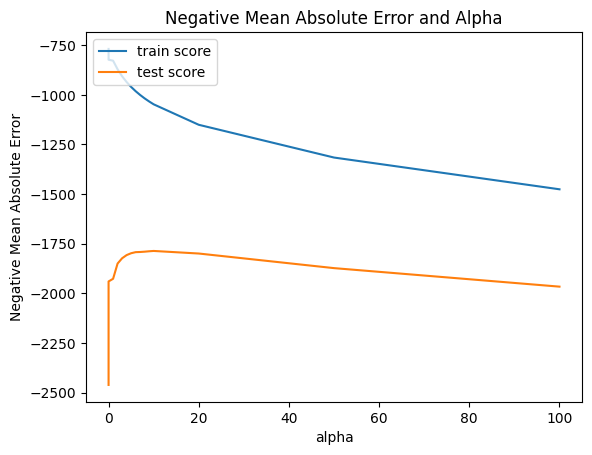

In [42]:
# change datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')


# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and Alpha')
plt.legend(['train score','test score'],loc='upper left')
plt.show

In [43]:
# checking best alpha from model_cv
model_cv.best_params_


{'alpha': 10.0}

As you can see that trai and test scores start to become parallel to each other after apha crosses 10. 
So lets check our ridge model on alpha 10.

In [44]:
#sel alpha as 10
alpha = 10

# Initialise Ridge() with above alpha
ridge = Ridge(alpha=alpha)

#fit model
ridge.fit(X_train,y_train)


#print ridge coeficients
ridge.coef_


array([-5.49685772e+02,  4.17666562e+02, -3.68506059e+01,  1.50926527e+03,
       -4.06887511e+02,  1.31988586e+03,  1.51499934e+03, -6.19381226e+01,
       -3.39580876e+02, -2.93535625e+01,  9.94522772e+02,  4.38449159e+02,
        4.94634948e+01, -4.15806342e+01,  2.98750806e+02,  2.07184870e+02,
        9.45180613e+01,  3.28558932e+01,  2.16109519e+02, -2.35803150e+02,
        4.59179309e+02,  6.28136763e+01, -2.49663717e+01, -5.93491553e+02,
       -3.57799855e+02, -2.46362056e+02, -2.24698186e+02,  1.95889305e+02,
        1.00638432e+03, -7.24193007e+01, -1.94214766e+02,  4.14908863e+02,
        1.13406861e+02, -3.57506199e+01,  1.32271027e+02, -5.97580041e+02,
       -5.84428942e+02, -2.04367801e+02,  3.27654927e+02, -3.20756216e+02,
        1.32271027e+02,  1.11239366e+02, -1.91418853e+02,  2.35803150e+02,
       -3.85877747e-28, -3.98184818e+01, -1.22606456e+02, -3.00049681e-28,
        2.68453146e+02,  1.40687973e+03,  1.01090268e+03, -2.42129156e+02,
       -5.18278710e+02, -

## Lasso

##### Cross validation and Hyperparameter tuning: GridSearchCV

In [45]:
# Initialise Lasso()
lasso = Lasso()

# cross validation and Hyperparameter tuning using lasso
#use same attributes used for Ridge tuning except estimator here would be lasso
model_cv = GridSearchCV(estimator=lasso,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=folds,
    return_train_score=True,
    verbose=1)



#fit model_cv
model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
# Save model_cv results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)


# cv_results head
cv_results.head()



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010207,0.001163,0.001597,0.000486,0.0001,{'alpha': 0.0001},-2201.869828,-1409.307201,-1567.134786,-3591.287799,...,-2216.924398,771.128613,14,-694.478983,-803.004547,-824.935037,-879.707046,-710.294680,-782.484058,70.187870
1,0.008948,0.000156,0.001382,0.000507,0.001,{'alpha': 0.001},-2202.709207,-1409.193554,-1567.181125,-3590.984135,...,-2216.989168,771.029509,15,-694.490486,-803.008624,-824.928609,-879.711660,-710.303676,-782.488611,70.183873
2,0.009220,0.000390,0.001072,0.000141,0.01,{'alpha': 0.01},-2211.127060,-1408.060916,-1567.642651,-3587.946962,...,-2217.644017,770.048902,16,-694.608307,-803.049088,-824.889455,-879.757632,-710.393078,-782.539512,70.146316
3,0.009413,0.000507,0.001400,0.000450,0.05,{'alpha': 0.05},-2248.886161,-1403.034838,-1569.656310,-3574.445750,...,-2220.659620,765.944051,17,-695.138711,-803.229385,-824.753209,-879.959118,-710.808429,-782.777770,69.978013
4,0.008933,0.000548,0.001412,0.000483,0.1,{'alpha': 0.1},-2296.297390,-1396.747927,-1572.073590,-3557.549590,...,-2224.538986,761.408435,18,-695.863387,-803.541292,-824.601532,-880.218250,-711.312677,-783.107428,69.765069


#### plotting mean test and train scores with alpha 


<function matplotlib.pyplot.show(close=None, block=None)>

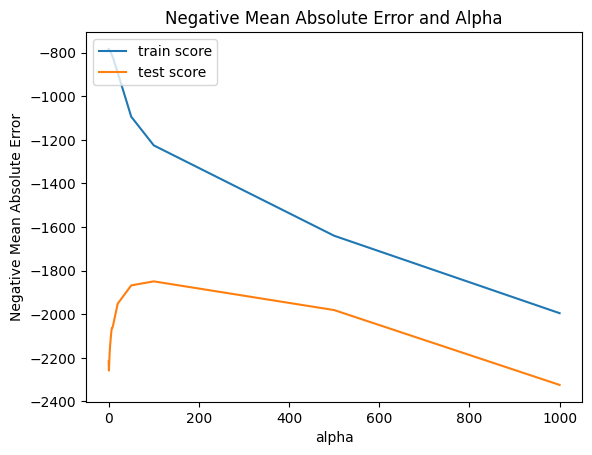

In [47]:
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and Alpha')
plt.legend(['train score','test score'],loc='upper left')
plt.show



In [48]:
# Checking best  alpha from model_cv
model_cv.best_params_


{'alpha': 100}

As you can see that trai and test scores start to become parallel to each other after apha crosses 100. So lets check our Lasso model on alpha 100.

In [49]:
# St alpha =100
alpha =100

# Define lasso with above alpha
lasso = Lasso(alpha=alpha)
  
# fit lasso
#fit model
lasso.fit(X_train,y_train)


#print lasso coeficients
lasso.coef_




array([-128.12973848,    0.        ,   -0.        , 1769.95717886,
        -64.88945737, 1803.72192936,  790.76065623,   -0.        ,
         -0.        ,    0.        , 1006.14184791,   95.64803224,
          0.        ,   -0.        ,    0.        ,   -0.        ,
         -0.        ,    0.        ,  263.21146624,  -51.73959811,
        126.11888194,    0.        ,    0.        , -199.33051383,
          0.        , -102.23928175, -120.03093273,  276.5189979 ,
       1217.8659338 ,    0.        ,   -0.        ,    0.        ,
         -0.        ,   -0.        ,    0.        ,   -0.        ,
       -205.77414662,   -0.        ,  195.09450993,   -0.        ,
          0.        ,   -0.        ,   -0.        ,   83.43851715,
         -0.        ,    0.        ,   -0.        ,   -0.        ,
        145.52178211, 1781.02866148, 1190.4505014 ,    0.        ,
         -0.        ,   -5.20913572,   75.53739207,  784.96700323,
         -0.        ,   -0.        , -395.29799055,  -44.92518

In [50]:
# print lasso coeficients
lasso.coef_


array([-128.12973848,    0.        ,   -0.        , 1769.95717886,
        -64.88945737, 1803.72192936,  790.76065623,   -0.        ,
         -0.        ,    0.        , 1006.14184791,   95.64803224,
          0.        ,   -0.        ,    0.        ,   -0.        ,
         -0.        ,    0.        ,  263.21146624,  -51.73959811,
        126.11888194,    0.        ,    0.        , -199.33051383,
          0.        , -102.23928175, -120.03093273,  276.5189979 ,
       1217.8659338 ,    0.        ,   -0.        ,    0.        ,
         -0.        ,   -0.        ,    0.        ,   -0.        ,
       -205.77414662,   -0.        ,  195.09450993,   -0.        ,
          0.        ,   -0.        ,   -0.        ,   83.43851715,
         -0.        ,    0.        ,   -0.        ,   -0.        ,
        145.52178211, 1781.02866148, 1190.4505014 ,    0.        ,
         -0.        ,   -5.20913572,   75.53739207,  784.96700323,
         -0.        ,   -0.        , -395.29799055,  -44.92518

# ElasticNet Regression

##### Cross validation and Hyperparameter tuning: GridSearchCV

In [51]:
from sklearn.linear_model import ElasticNet

# Initialise Lasso()
elasticnet = ElasticNet()

# cross validation and Hyperparameter tuning using lasso
#use same attributes used for Ridge tuning except estimator here would be ElasticNet
model_cv = GridSearchCV(estimator=elasticnet,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=folds,
    return_train_score=True,
    verbose=1)
#fit model_cv
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
# Save model_cv results into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)


# cv_results head
cv_results.head()



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010223,0.000986,0.001806,0.000391,0.0001,{'alpha': 0.0001},-2241.439026,-1402.995975,-1572.092227,-3485.261290,...,-2203.748122,734.398382,16,-696.153628,-803.114090,-823.831981,-879.122892,-710.291618,-782.502842,69.482376
1,0.009017,0.000628,0.001202,0.000398,0.001,{'alpha': 0.001},-2421.870431,-1368.791163,-1599.888826,-3151.310155,...,-2176.316342,635.920824,15,-708.193513,-807.250105,-816.072067,-875.913011,-709.529129,-783.391565,65.280732
2,0.009595,0.000463,0.001741,0.000568,0.01,{'alpha': 0.01},-2423.976262,-1404.405197,-1547.365105,-2376.373316,...,-1995.383236,431.613499,13,-746.333799,-839.156447,-826.340400,-890.723444,-735.536394,-807.618097,58.657017
3,0.004401,0.000493,0.001400,0.000491,0.05,{'alpha': 0.05},-2449.848439,-1469.693915,-1478.034700,-1942.530616,...,-1826.309431,361.107764,6,-807.238376,-939.623630,-953.868915,-970.750551,-838.699813,-902.036257,66.059416
4,0.003968,0.000184,0.001387,0.000546,0.1,{'alpha': 0.1},-2525.437528,-1510.666868,-1479.620494,-1749.737349,...,-1792.780915,380.840127,2,-862.771823,-1022.194937,-1036.572809,-1047.013713,-911.968943,-976.104445,74.520503


#### plotting mean test and train scores with alpha

<function matplotlib.pyplot.show(close=None, block=None)>

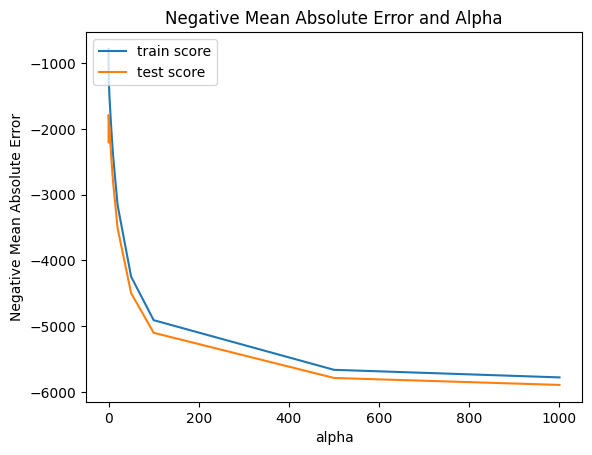

In [53]:
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and Alpha')
plt.legend(['train score','test score'],loc='upper left')
plt.show




In [54]:
# Checking best  alpha from model_cv
model_cv.best_params_



{'alpha': 0.2}

In [55]:
# St alpha =0.2
alpha = 0.2

# Define lasso with above alpha
elasticnet = ElasticNet(alpha=alpha)
  
# fit lasso
#fit model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.2)

In [56]:
# print lasso coeficients
elasticnet.coef_


array([-527.5286837 ,  397.39403709,   88.99844539, 1385.10314474,
       -317.95659568, 1178.43733972, 1334.9269385 ,   37.12911698,
       -290.51827945,   16.86780484,  932.13073548,  357.33525507,
         -0.        ,  -79.59281396,  249.92710563,  152.72302707,
         44.01733306,  -10.38305554,  223.73600735, -214.18329724,
        434.14578167,   79.51150155,   34.93027422, -501.74889467,
       -260.08441243, -211.46927454, -238.49848902,  237.64166345,
        927.66137384,  -17.49426834, -207.1702248 ,  345.26175505,
         81.27722185,   -7.716903  ,  100.25135397, -491.90480134,
       -587.91990653, -100.04590125,  294.85180878, -229.94932684,
        100.24370739,   74.89421509, -178.70351005,  214.1949413 ,
         -0.        ,   12.32922478, -132.25244975,   -0.        ,
        246.67618555, 1349.6483358 , 1023.2406989 , -193.02575625,
       -442.031452  , -370.94803677,  -76.83152328,  781.71592297,
       -292.02457744,   -0.        , -612.35566922, -366.28719

In [57]:
# Calculate all 3 predictions 
pred_l = lasso.predict(X_test)
pred_r = ridge.predict(X_test)
pred_en = elasticnet.predict(X_test)

In [58]:
# import mean_squared_error module
from sklearn.metrics import mean_squared_error

# print RMSE for all 3 techniques
print('Lasso RMSE',np.sqrt(mean_squared_error(y_test,pred_l)))
print('Ridge RMSE',np.sqrt(mean_squared_error(y_test,pred_r)))
print('ElasticNet RMSE',np.sqrt(mean_squared_error(y_test,pred_en)))


Lasso RMSE 2487.641946837406
Ridge RMSE 2340.1794060218926
ElasticNet RMSE 2396.7253465072376


In [73]:
#importing libraries PolynomialFeatures, LinearRegression, Pipeline  , metrics from sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [74]:
#fetching data
elec_cons = pd.read_csv('total-electricity-consumption-us.csv', sep=',',header=0)
elec_cons.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [75]:
# number of observations: 51
elec_cons.shape

(51, 2)

In [76]:
# checking NA
# there are no missing values in the dataset
elec_cons.isnull().values.any()

False

In [77]:
#Defining length of elec_cons index
size = len(elec_cons.index)

# Defining custom index which ranges from 0 to size and step size as  5
index = range(0,size,5)

#train will not have same index which is is defined above
train = elec_cons[~elec_cons.index.isin(index)]

#test will have same index which is is defined above
test = elec_cons[elec_cons.index.isin(index)]


In [78]:
#print train and test length
print(len(train))
print(len(test))

40
11


In [79]:
# converting X to a two dimensional array, as required by the learning algorithm
#Making X_train two dimensional
X_train = train.Year.values.reshape(-1,1)

#Defining y_train
y_train = train.Consumption

#Making X_test two dimensional
X_test = test.Year.values.reshape(-1,1)

#Defining y_test
y_test = test.Consumption

In [69]:
X_train.shape

(40, 1)

In [70]:
y_train.shape

(40,)

In [71]:
X_test.shape

(40, 1)

In [72]:
y_test.shape

(11,)

Doing a polynomial regression: Comparing linear, quadratic and cubic fits

Pipeline helps you associate two models or  s to be built sequentially with each other, in this case, the  s are PolynomialFeatures() and LinearRegression()

In [84]:
# Defining empty array r2_train and r2_test
r2_train = []
r2_test = []

#Define degrees as list with 1,2 and 3 as elements
degrees = [1,2,3]



In [85]:
X_test.shape

(40, 1)

In [86]:
y_test.shape

(11,)

In [87]:
y_pred.shape

(40,)

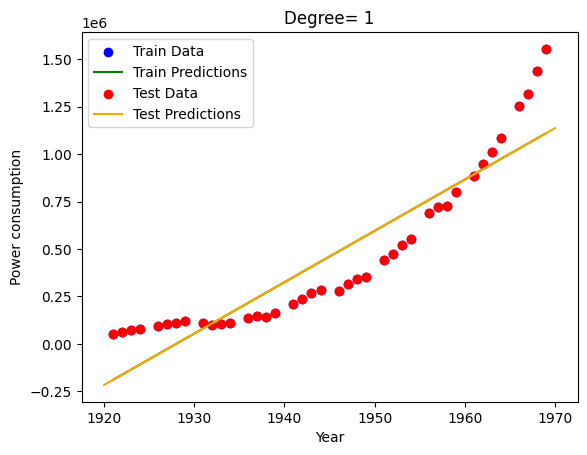

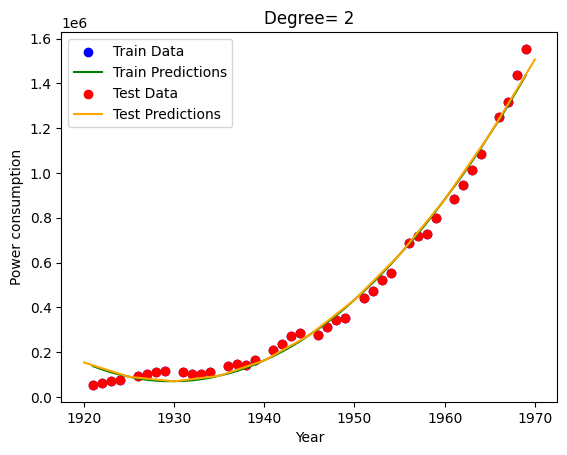

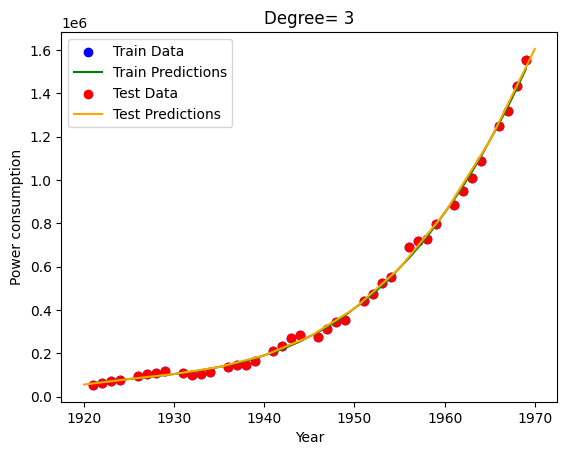

In [85]:
for degree in degrees:
    # Initializing pipeline
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                         ('model', LinearRegression())])

    # Fitting pipeline with train and test
    pipeline.fit(X_train, y_train)

    # Test performance
    y_pred= pipeline.predict(X_test)
    
    # Appending r2_test with r2_score
    r2_test.append(metrics.r2_score(y_test, y_pred))
    
    # Training performance
    y_pred_train = pipeline.predict(X_train)
    
    # Appending r2_train with r2_score
    r2_train.append(metrics.r2_score(y_train, y_pred_train))

    # Plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))

    # Train data in blue
    ax.scatter(X_train, y_train, color='blue', label='Train Data')
    ax.plot(X_train, y_pred_train, color='green', label='Train Predictions')

    # Test data in red
    ax.scatter(X_train, y_train, color='red', label='Test Data')
    ax.plot(X_test, y_pred, color='orange', label='Test Predictions')

    ax.legend()
    plt.show()


In [86]:
# respective test r-squared scores of predictions
print(degrees)
print(r2_train)
print(r2_test)

[1, 2, 3]
[0.8423747402176137, 0.9908896744553399, 0.9979789884229612]
[0.816517046382681, 0.9876080502675171, 0.998490019372777]
